In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
data=pd.read_csv('netflix_titles.csv',parse_dates=['date_added'])
data.shape


(8807, 12)

In [3]:
# The dataset contains 12 columns for exploratory analysis.
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


We Have some missing values in director,cast,date_added,rating and duration

In [5]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Handling Missing Data
data.director.fillna("No Director", inplace=True)
data.cast.fillna("No Cast", inplace=True)
data.country.fillna("Country Unavailable", inplace=True)
data.dropna(subset=["date_added", "rating","duration"], inplace=True)

In [7]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [8]:
# Adding Day corresponding to date
day_map={0:'Monday',
         1:'Tuesday',
         2:'Wednesday',
         3:'Thursday',
         4:'Friday',
         5:'Saturday',
         6:'Sunday'}


month_map={1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'}

data['DayOfWeek']=data['date_added'].map(lambda x: day_map[x.dayofweek])

data['year_added'] = pd.DatetimeIndex(data['date_added']).year

data['month_added']=data['date_added'].map(lambda x: month_map[x.month])

In [32]:
data['genre'] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [33]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,DayOfWeek,year_added,month_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021,September,[Documentaries]
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021,September,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021,September,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021,September,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021,September,"[International TV Shows, Romantic TV Shows, TV..."


In [10]:
data.describe()

,release_year,year_added
count,8790.000000,8790.000000
mean,2014.183163,2018.873606
std,8.825466,1.573568
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


## Exploratory Analysis and Visualization

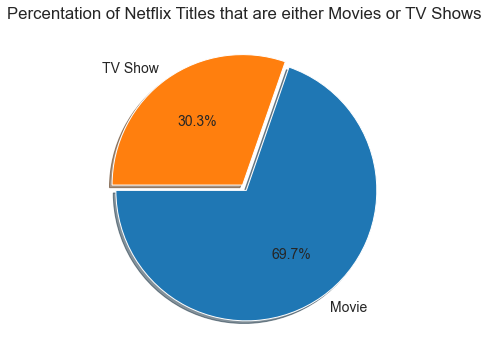

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(data.type.value_counts(),explode=(0.025,0.025), labels=data.type.value_counts().index, autopct='%1.1f%%' ,startangle=180, shadow = True);
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows");

It is evident that there are more Movies on Netflix than TV shows.

In [12]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,DayOfWeek,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021,September
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021,September
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021,September
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021,September


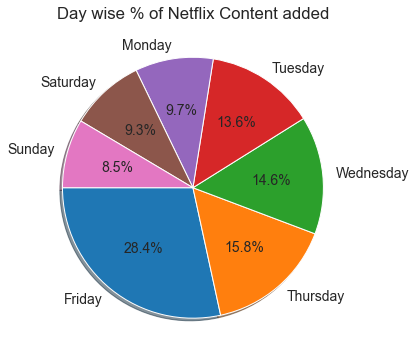

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(data["DayOfWeek"].value_counts(), labels=data["DayOfWeek"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="Day wise % of Netflix Content added");

Pie chart shows majority of the content is added on Thursday & Friday

In [18]:
data.month_added.value_counts()

July         827
December     812
September    769
April        763
October      760
August       754
March        741
January      737
June         728
November     705
May          632
February     562
Name: month_added, dtype: int64

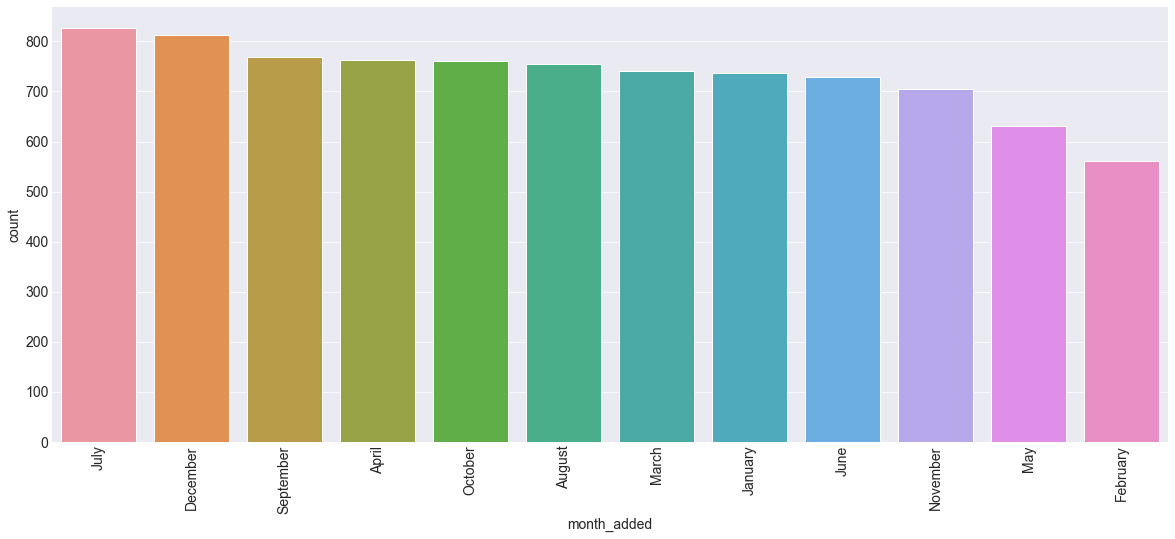

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(x='month_added',data= data,order =data['month_added'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


Majority of the content is released in the month of July and December

### Movie Rating Analysis

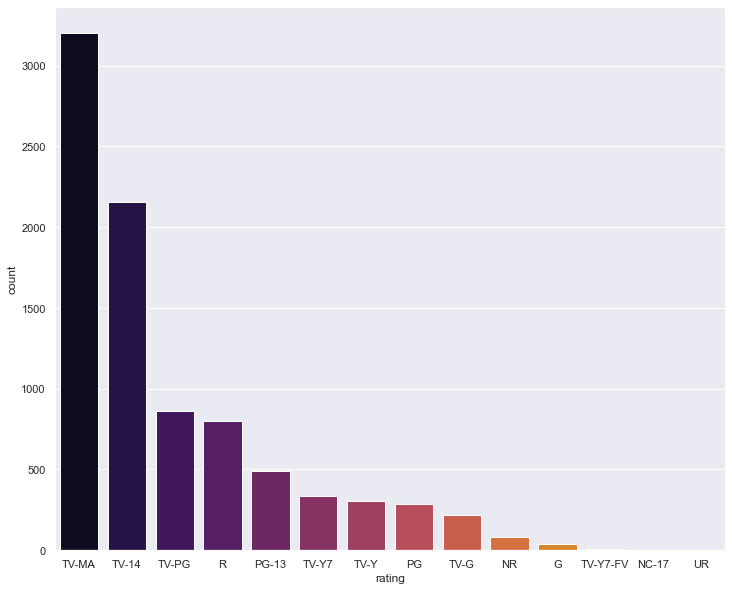

In [21]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=data, palette="inferno", order=data['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

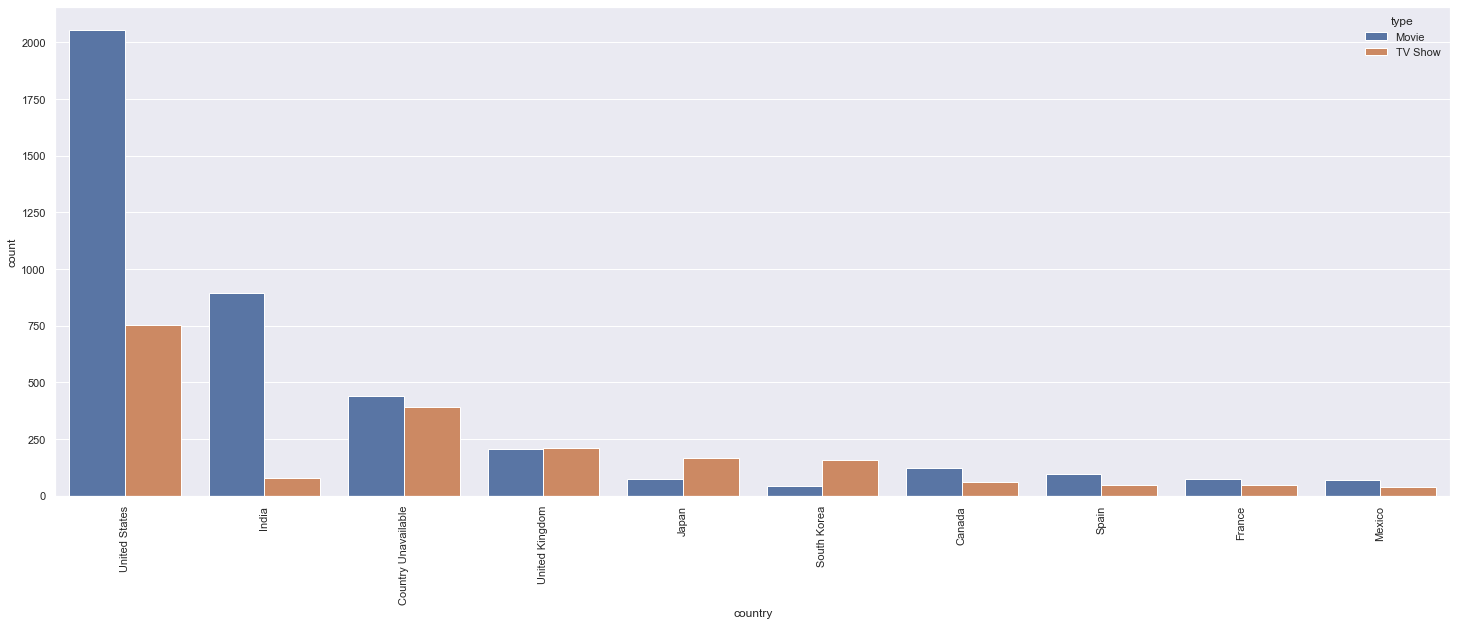

In [38]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= data,hue= "type",order = data['country'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

United States provides the Highest number of Movies & Tv Shows Because of Hollywood,then at 2nd place India provides the Highest number of Movies because of Bollywood

In [43]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,DayOfWeek,year_added,month_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021,September,[Documentaries]
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021,September,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021,September,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021,September,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021,September,"[International TV Shows, Romantic TV Shows, TV..."


In [51]:
movies=data[data['type']=='Movie']
shows=data[data['type']=='TV Show']

In [52]:
movies['duration']=movies['duration'].str.replace('min','')
movies['duration']=movies['duration'].astype(str).astype(int)
movies['duration']

<ipython-input-52-d785bf9a747b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].str.replace('min','')
<ipython-input-52-d785bf9a747b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].astype(str).astype(int)


0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int32

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

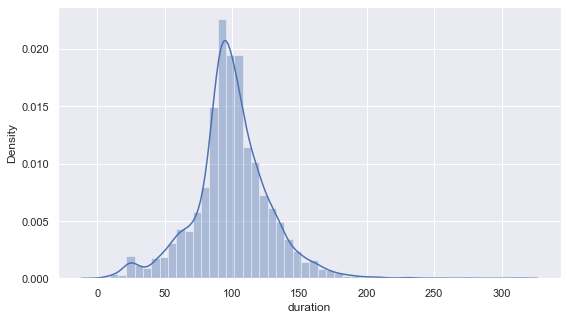

In [49]:
sns.set(style="darkgrid")
sns.distplot(movies['duration'])

Majority of the movies are between 90 to 120 min

<ipython-input-58-8deb226786d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
<ipython-input-58-8deb226786d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
<ipython-input-58-8deb226786d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

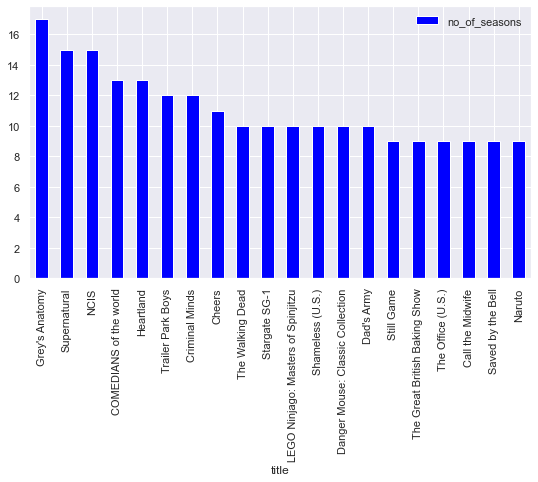

In [58]:
features=['title','duration']
durations= shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)


t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue');


NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.


### Top Directors


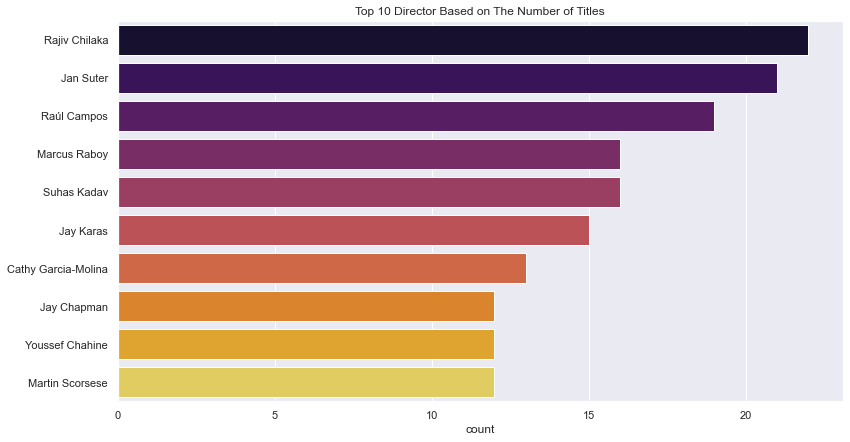

In [60]:
filtered_directors = data[data.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='inferno')
plt.show()

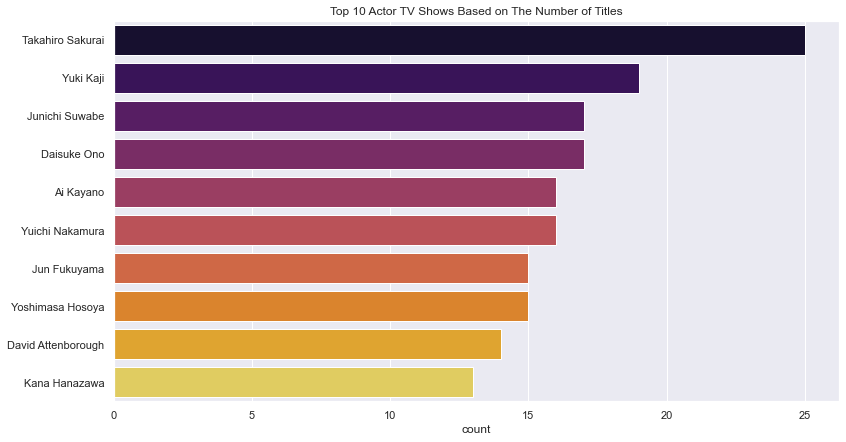

In [62]:
filtered_cast_shows = shows[shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='inferno')
plt.show()

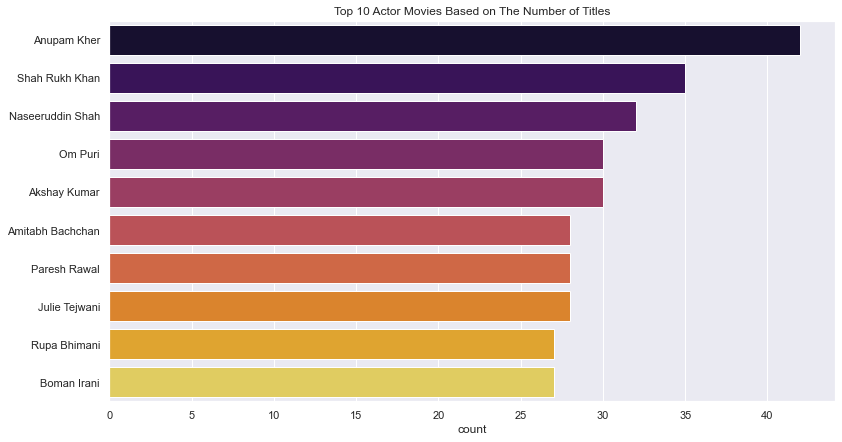

In [64]:
filtered_cast_movie = movies[movies.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='inferno')
plt.show()

### Wordcloud title

In [69]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,DayOfWeek,year_added,month_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021,September,[Documentaries]
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021,September,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021,September,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021,September,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021,September,"[International TV Shows, Romantic TV Shows, TV..."


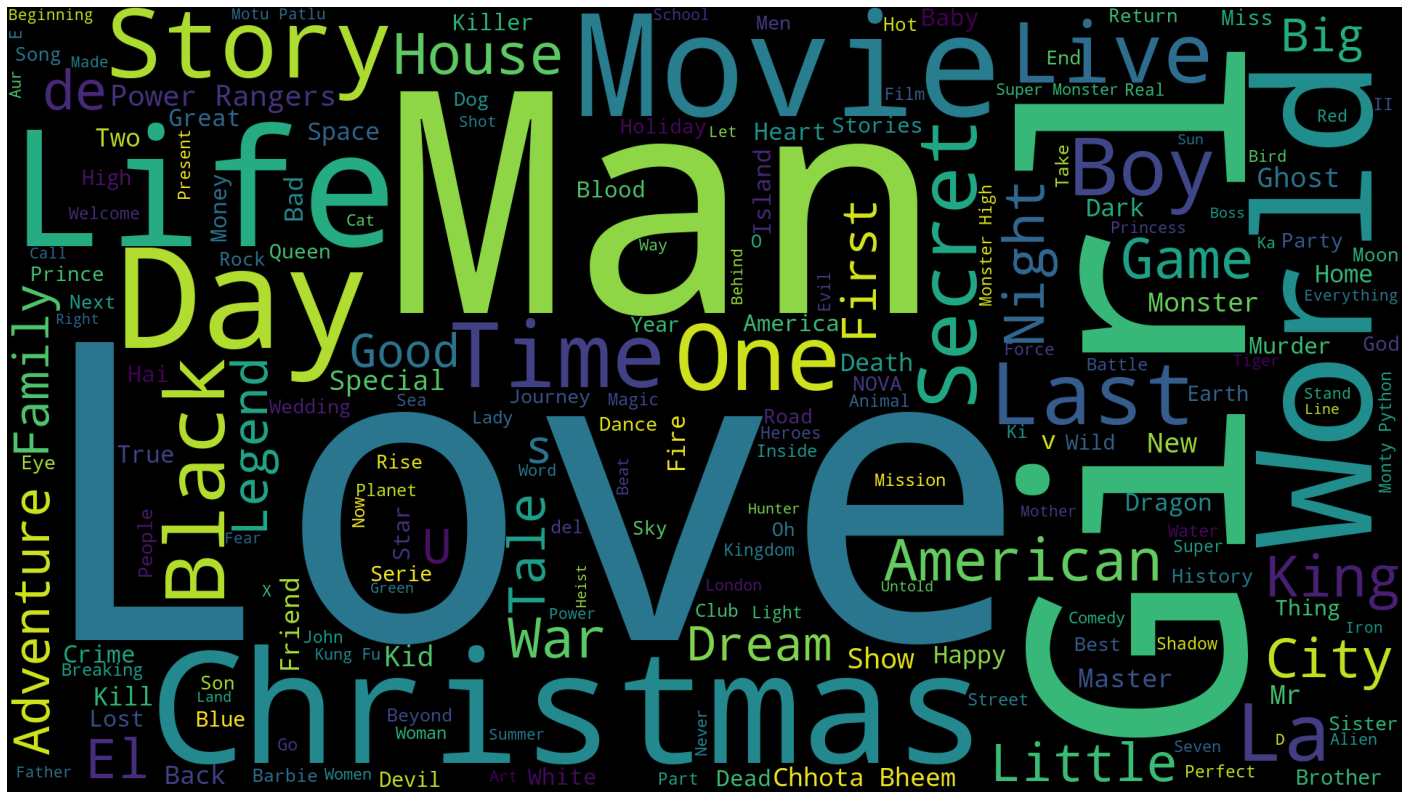

In [71]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
